<a href="https://colab.research.google.com/github/umeshpardeshi9545/titanic-survival-prediction-/blob/main/Multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Required Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.preprocessing import MinMaxScaler

import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#---- For handling warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Loding Data set into coding environment
df=pd.read_csv("/content/ToyotaCorolla - MLR.csv")

In [ ]:
# Data set first look  (First five rows)
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
# Data set first look (Last Five rows)
df.tail()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015
1435,6950,76,1,Petrol,110,0,1600,5,4,5,1114


In [ ]:
#  Data set rows and column
df.shape

print(f"Data set contain total: {df.shape[0]} rows and {df.shape[1]} columns")

Data set contain total: 1436 rows and 11 columns


In [ ]:
# Data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
# Data set decription
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
# Duplicated values
df.duplicated().sum()

1

In [ ]:
# Treating Diplicated row
df.drop_duplicates(inplace=True)

In [ ]:
# After treating duplicated value
df.duplicated().sum()

0

In [ ]:
# Null values
print(df.isnull().sum())

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64


<Axes: >

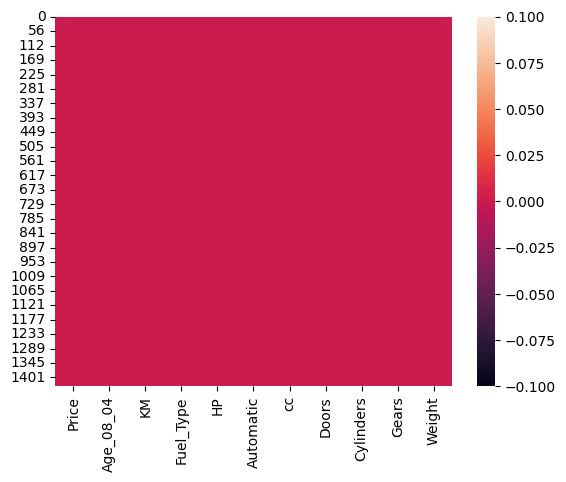

In [ ]:
# Visulaising Null values
sns.heatmap(df.isnull())

In [ ]:
# Data set column
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i, "is",df[i].nunique(),".")

No. of unique values in  Price is 236 .
No. of unique values in  Age_08_04 is 77 .
No. of unique values in  KM is 1263 .
No. of unique values in  Fuel_Type is 3 .
No. of unique values in  HP is 12 .
No. of unique values in  Automatic is 2 .
No. of unique values in  cc is 13 .
No. of unique values in  Doors is 4 .
No. of unique values in  Cylinders is 1 .
No. of unique values in  Gears is 4 .
No. of unique values in  Weight is 59 .


# Data Preprocessing

In [ ]:
# Dropping Unwanted Columns
df.drop(columns=['Cylinders'],inplace=True)

In [ ]:
#Insights
fuel_type_vs_price=df.groupby(df['Fuel_Type'])['Price'].mean()
fuel_type_vs_price

,Price
Fuel_Type,
CNG,9421.176471
Diesel,11205.883117
Petrol,10679.310127


<Axes: xlabel='Fuel_Type'>

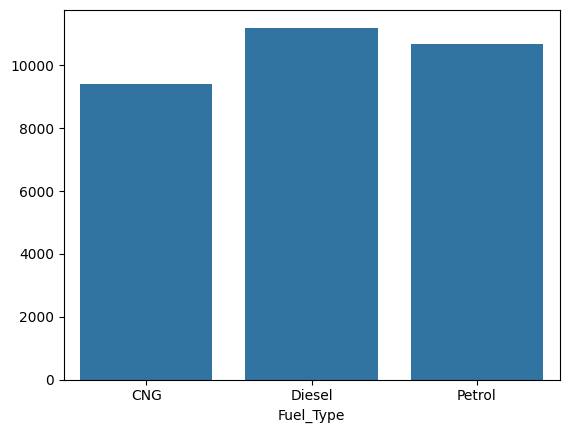

In [ ]:
sns.barplot(x=fuel_type_vs_price.index,y=fuel_type_vs_price.values)

*  We can say by seeing above plot Disel car is much  costlier as compare to Petrol followe by Diesel

In [ ]:
fuel_type_vs_hp=df.groupby(df['Fuel_Type'])['HP'].mean()
fuel_type_vs_hp


,HP
Fuel_Type,
CNG,110.000000
Diesel,78.292208
Petrol,104.204114


<Axes: xlabel='Fuel_Type'>

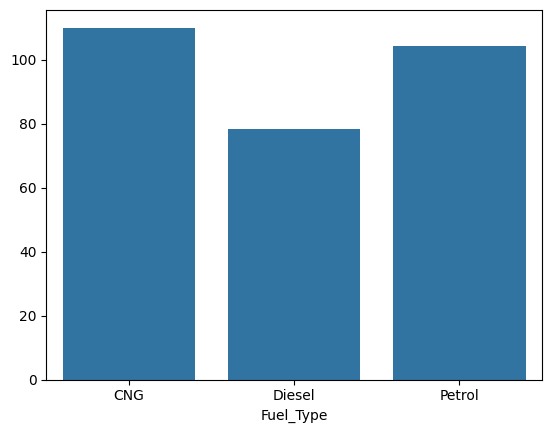

In [ ]:
sns.barplot(x=fuel_type_vs_hp.index,y=fuel_type_vs_hp.values)

In [ ]:
fuel_type_vs_cc=df.groupby(df['Fuel_Type'])['cc'].mean()
fuel_type_vs_cc

,cc
Fuel_Type,
CNG,1599.882353
Diesel,1976.396104
Petrol,1527.533228


<Axes: xlabel='Fuel_Type'>

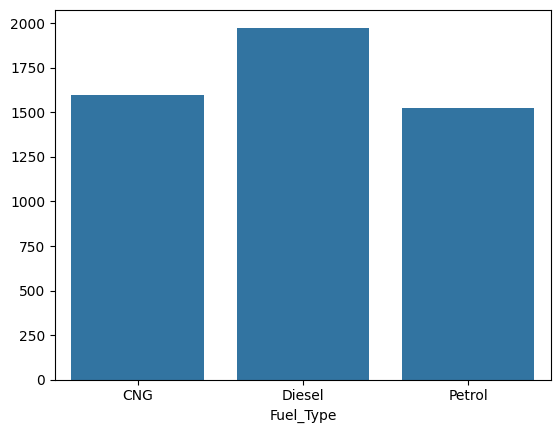

In [ ]:
sns.barplot(x=fuel_type_vs_cc.index,y=fuel_type_vs_cc.values)


In [ ]:
fuel_type_vs_KM=df.groupby(df['Fuel_Type'])['KM'].mean()
fuel_type_vs_KM

,KM
Fuel_Type,
CNG,117865.588235
Diesel,112618.649351
Petrol,62542.342563


<Axes: xlabel='Fuel_Type'>

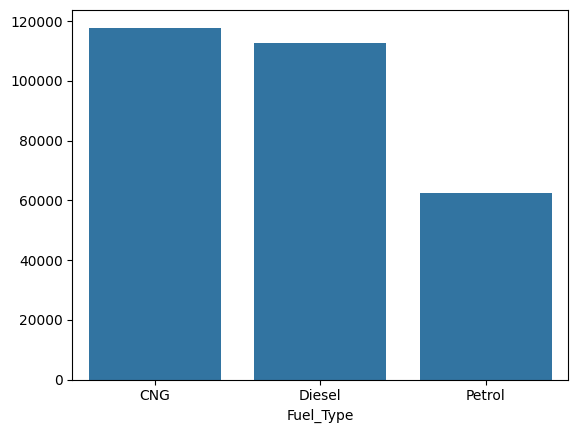

In [ ]:
sns.barplot(x=fuel_type_vs_KM.index,y=fuel_type_vs_KM.values)

* we can say by seeing above graph car with CNG fuel type most driven.


In [ ]:
Gears_vs_Price=df.groupby(df['Gears'])['Price'].mean()
Gears_vs_Price

,Price
Gears,
3,9450.000000
4,9950.000000
5,10682.670266
6,12033.372093


<Axes: xlabel='Gears'>

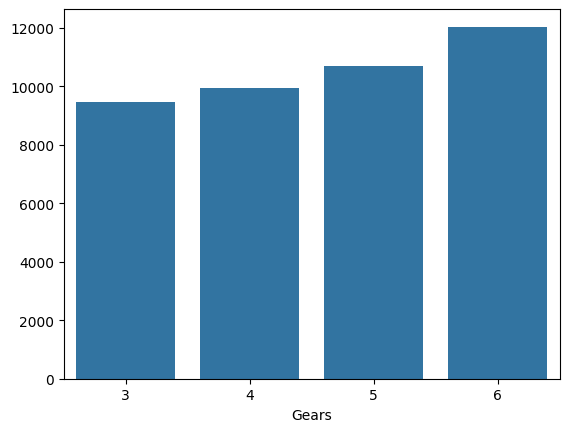

In [ ]:
sns.barplot(x=Gears_vs_Price.index,y=Gears_vs_Price.values)

* above graph says car with  gear have high price than 5, 4 and 3 gears.

In [ ]:
Gears_vs_cc=df.groupby(df['Gears'])['cc'].mean()
Gears_vs_cc

,cc
Gears,
3,1600.000000
4,1600.000000
5,1575.208783
6,1618.604651


<Axes: xlabel='Gears'>

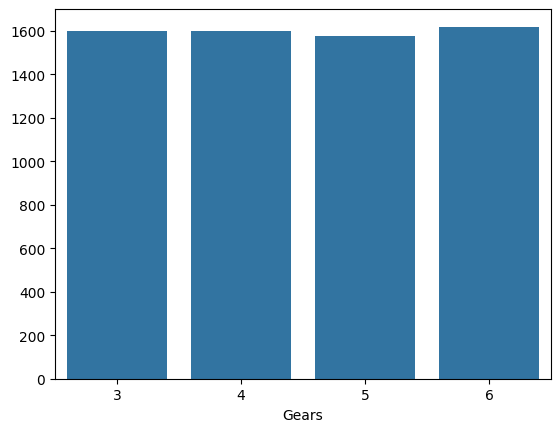

In [ ]:
sns.barplot(x=Gears_vs_cc.index,y=Gears_vs_cc.values)


*  we can say by seeing above graph car with 6 gear have high hourse power followed by 5,4, and 3 gears

<Axes: ylabel='Price'>

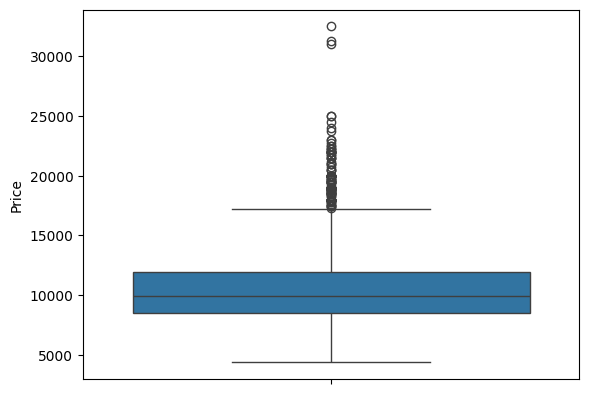

In [ ]:
# Otliers Visualization
sns.boxplot(df['Price'])

*  Above graph shows outliers are present in price column at upper extreme region. its right skew.

<Axes: ylabel='Age_08_04'>

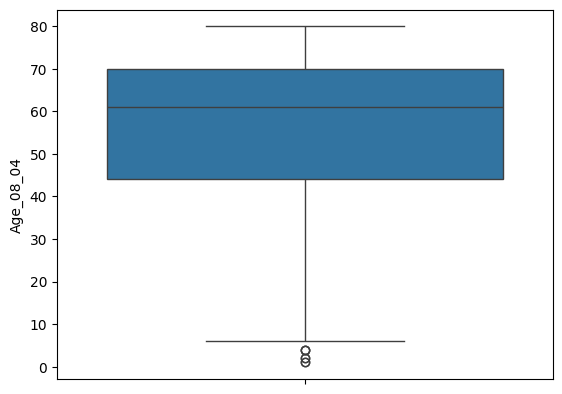

In [ ]:
sns.boxplot(df['Age_08_04'])

*  By seeing above boxblot we can see outliers are present at lower extreme region. its left skew.

<Axes: ylabel='KM'>

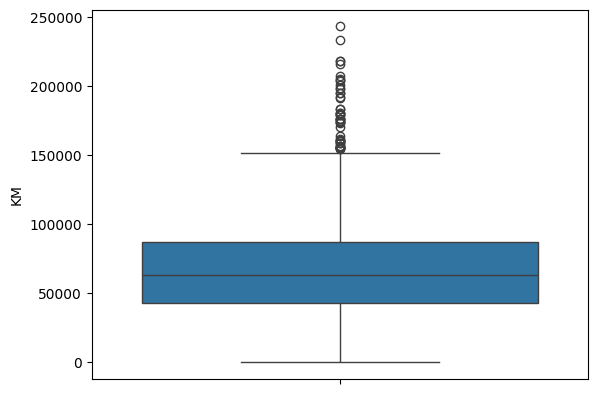

In [ ]:
sns.boxplot(df['KM'])

* Above graph shows the outlier are present at upper extreme region and there is no skewness.

<Axes: ylabel='HP'>

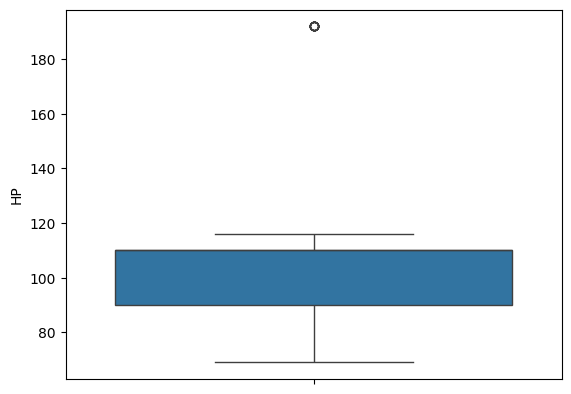

In [ ]:
sns.boxplot(df['HP'])

*  In HP column we can see there is a one outlier present at upper extreme region.

<Axes: ylabel='cc'>

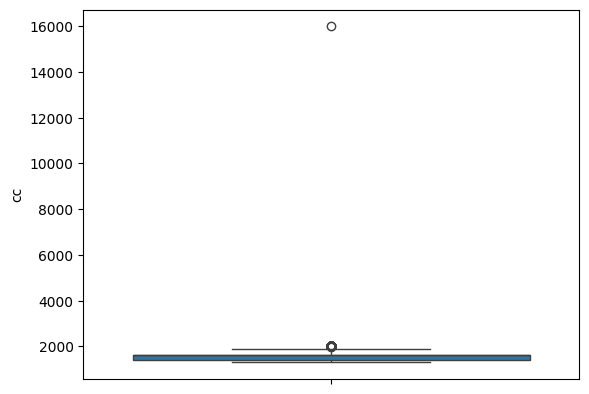

In [ ]:
sns.boxplot(df['cc'])

* By seeing above graph there is outlier present at upper extreme region.

<Axes: ylabel='Doors'>

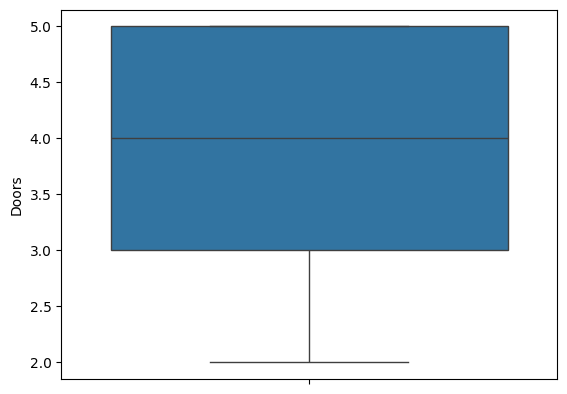

In [ ]:
sns.boxplot(df['Doors'])

* In doors columns there is no outlier are present.

<Axes: ylabel='Gears'>

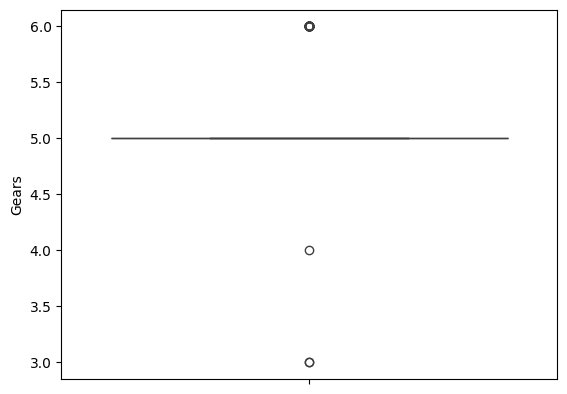

In [ ]:
sns.boxplot(df['Gears'])

<Axes: ylabel='Weight'>

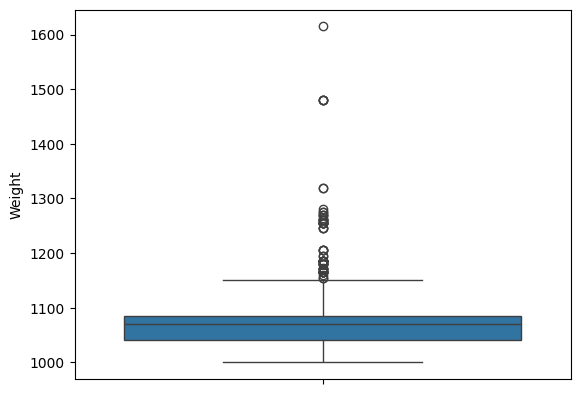

In [ ]:
sns.boxplot(df['Weight'])

*  By seeing above column we can see say outliers are present at upper extreme region.

In [ ]:
['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight']

['Price',
 'Age_08_04',
 'KM',
 'Fuel_Type',
 'HP',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Weight']

# Outlier Treatment using Capping technique.

In [ ]:
#Function Created For capping
def outlier_treatment(df,column):
  Q1,Q3=df[column].quantile([0.25,0.75])
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  return lower_limit,upper_limit,Q1,Q3


In [ ]:
# Outlier Treatment on Price Columns
outlier_treatment(df,'Price')

(3200.0, 17200.0, 8450.0, 11950.0)

<Axes: ylabel='Price'>

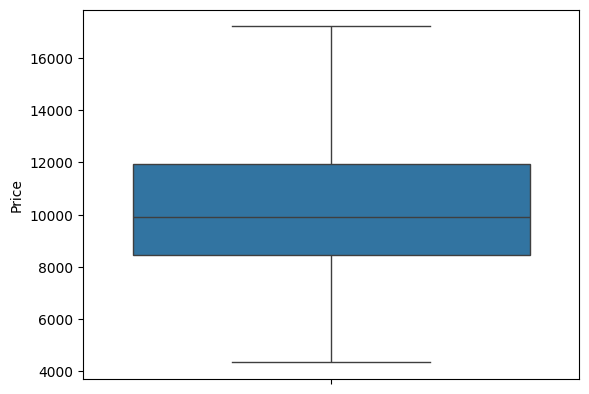

In [ ]:
df.loc[df['Price'] > 17200,'Price']=17200
sns.boxplot(df['Price'])

In [ ]:
# Outlier Treatment on Price Age_08_04
outlier_treatment(df,'Age_08_04')



(5.0, 109.0, 44.0, 70.0)

<Axes: ylabel='Age_08_04'>

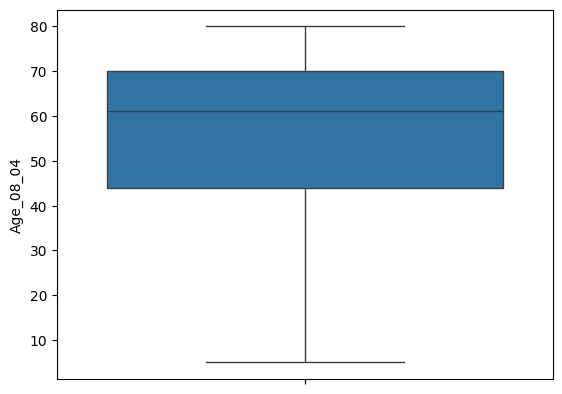

In [ ]:
df.loc[df['Age_08_04'] < 5,'Age_08_04']=5
sns.boxplot(df['Age_08_04'])

In [ ]:
outlier_treatment(df,'HP')

(60.0, 140.0, 90.0, 110.0)

<Axes: ylabel='HP'>

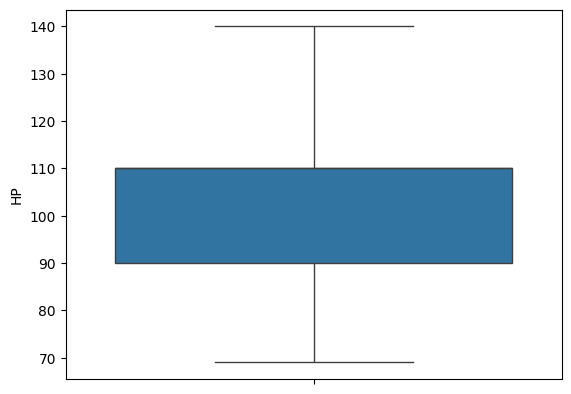

In [ ]:
df.loc[df['HP'] > 140,'HP']=140
sns.boxplot(df['HP'])

In [ ]:
outlier_treatment(df,'cc')


(1100.0, 1900.0, 1400.0, 1600.0)

<Axes: ylabel='cc'>

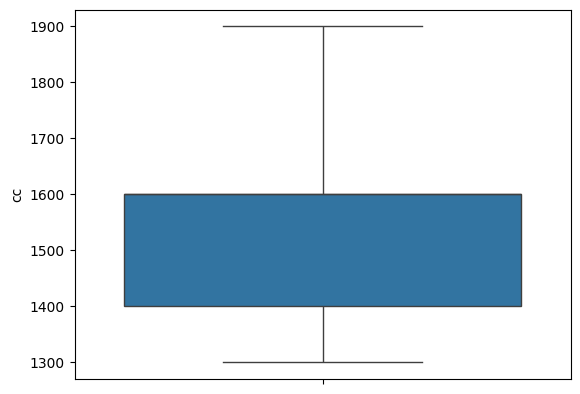

In [ ]:
df.loc[df['cc']>1900, 'cc']=1900
sns.boxplot(df['cc'])

In [ ]:
outlier_treatment(df,'Weight')

(972.5, 1152.5, 1040.0, 1085.0)

<Axes: ylabel='Weight'>

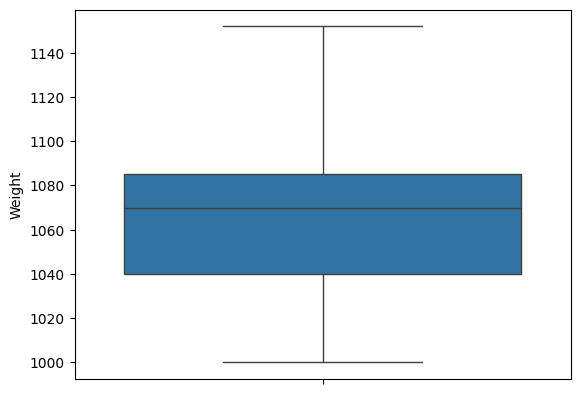

In [ ]:
df.loc[df['Weight']>1152,'Weight']=1152
sns.boxplot(df['Weight'])

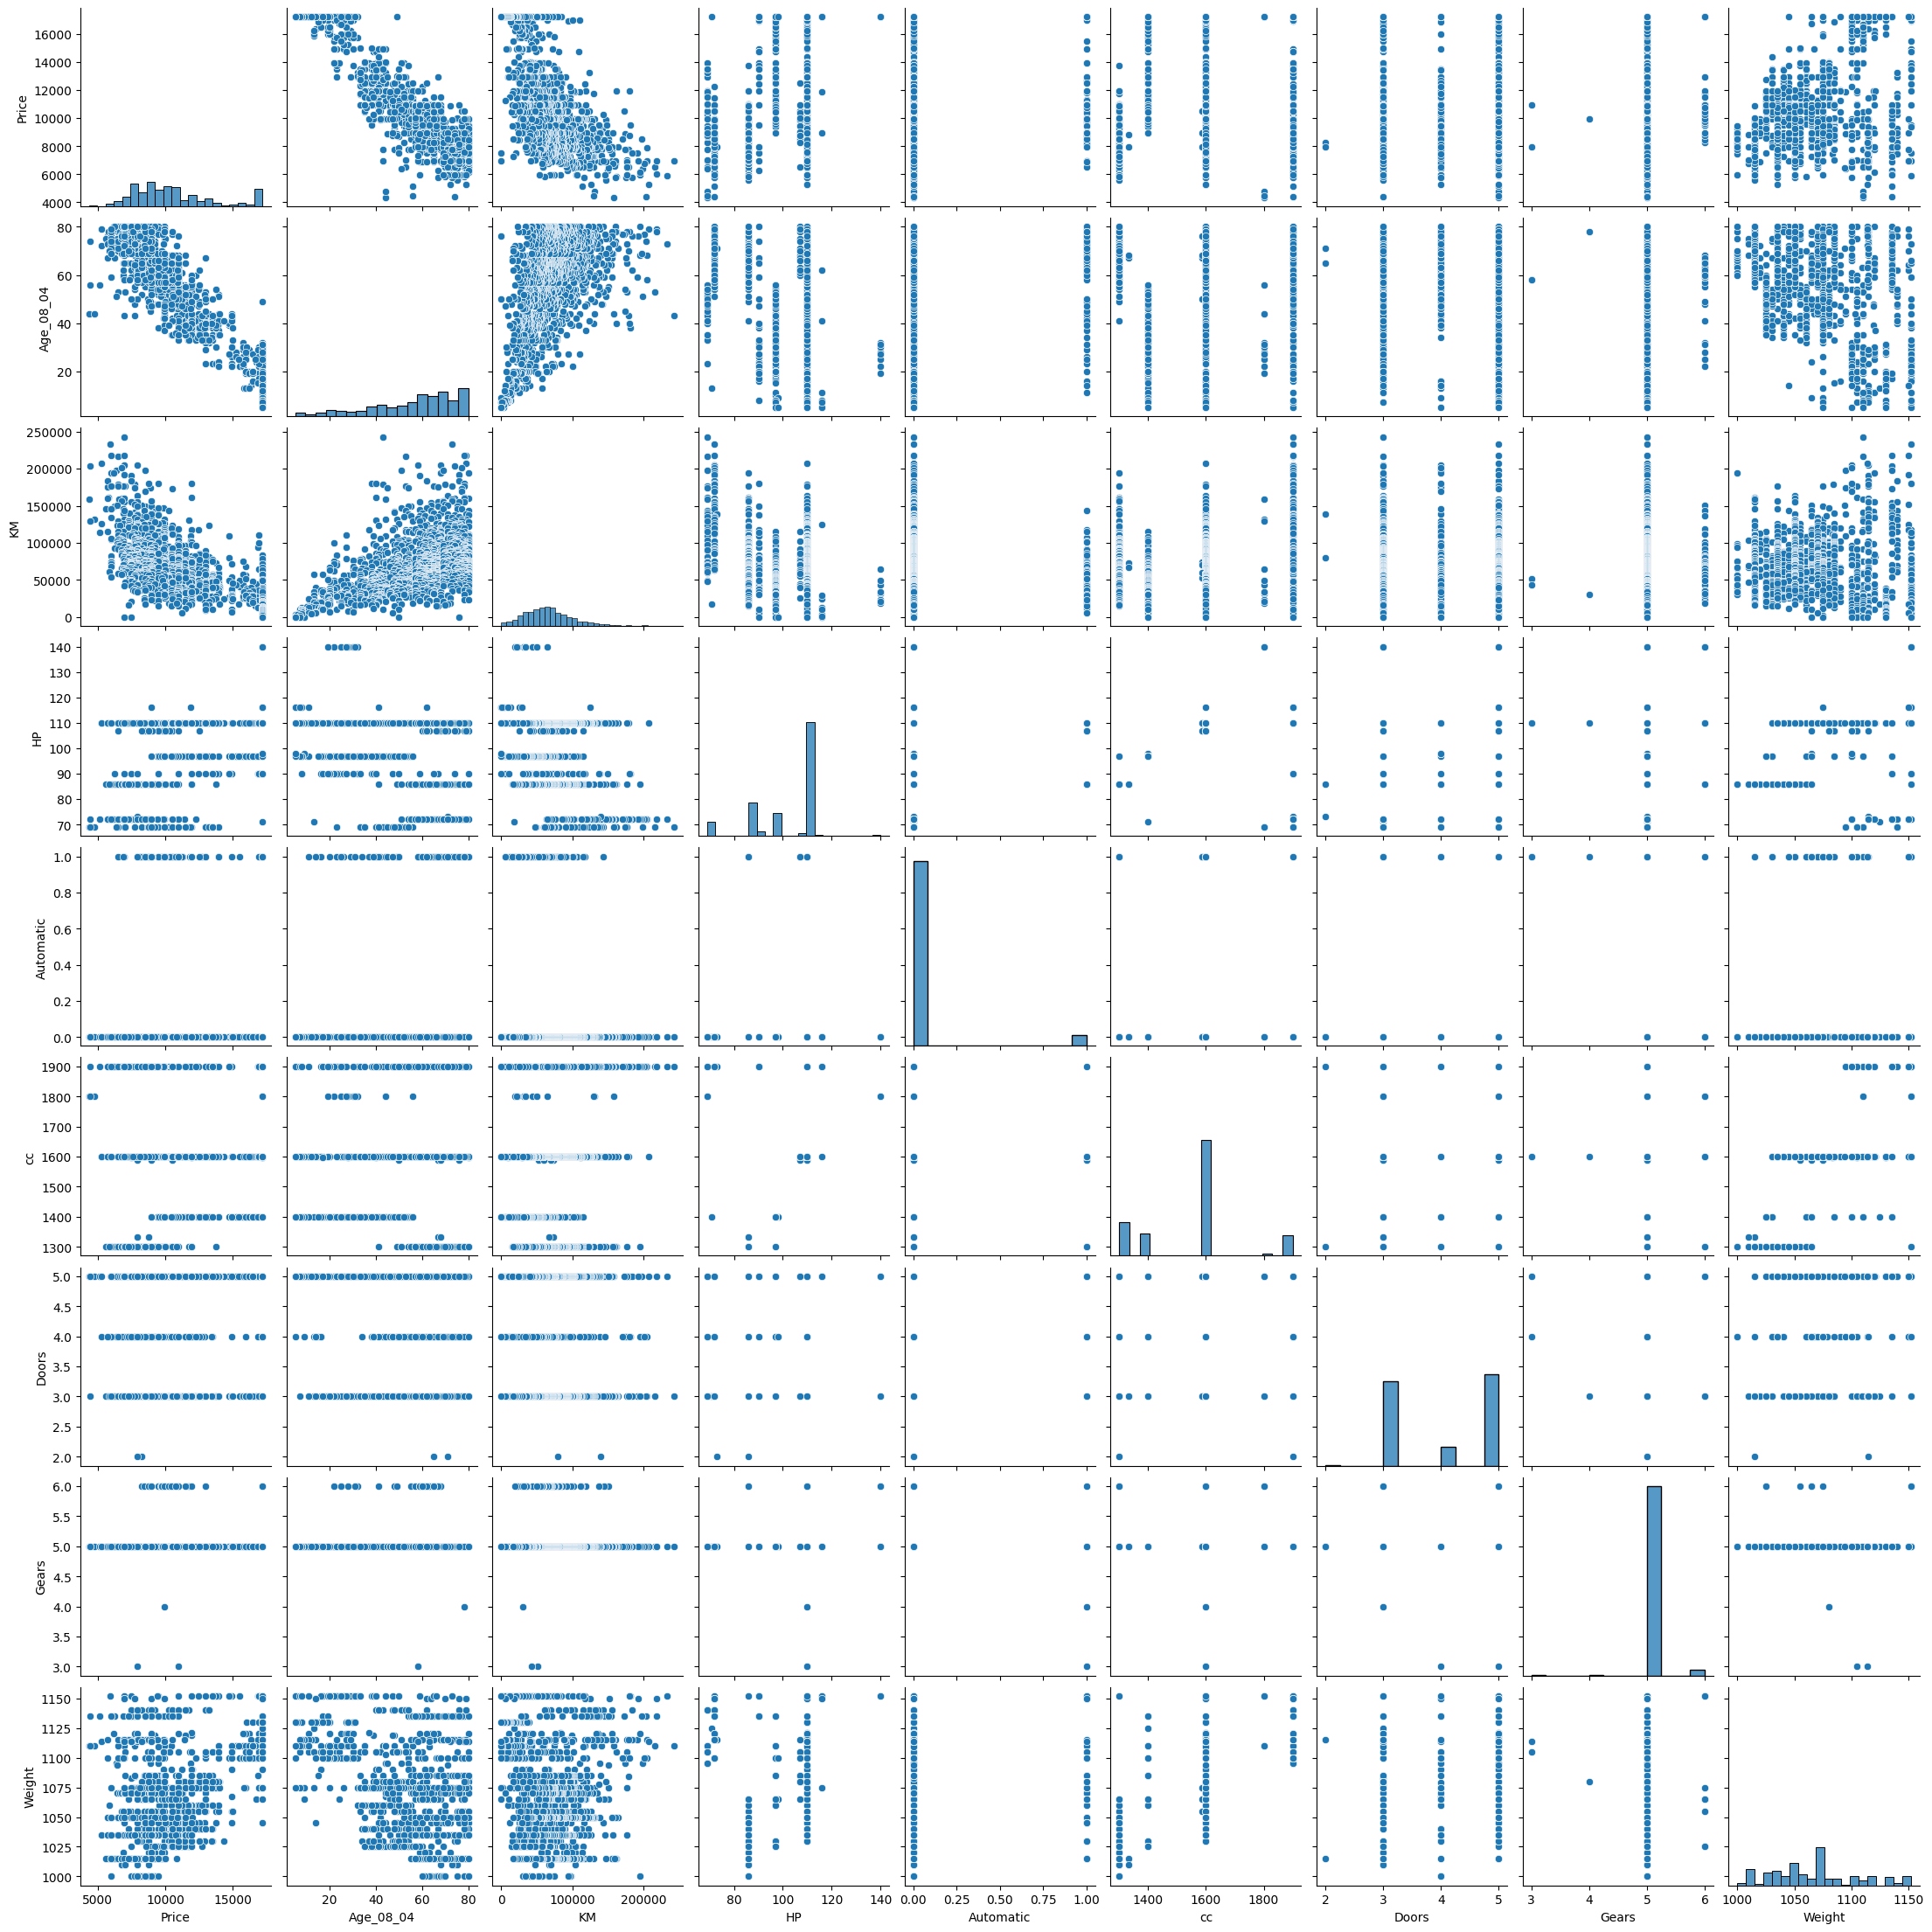

In [ ]:
# Checking columns Relation
sns.pairplot(df)

In [ ]:
# Correlation
df.corr(numeric_only=True)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight
Price,1.000000,-0.895340,-0.592550,0.254427,0.035860,0.129352,0.183010,0.053141,0.507476
Age_08_04,-0.895340,1.000000,0.504325,-0.129602,0.031255,-0.136644,-0.146704,-0.005729,-0.475845
KM,-0.592550,0.504325,1.000000,-0.351353,-0.082168,0.279492,-0.035193,0.014890,0.029525
HP,0.254427,-0.129602,-0.351353,1.000000,0.022541,0.098192,0.120139,0.140777,0.024753
Automatic,0.035860,0.031255,-0.082168,0.022541,1.000000,-0.059263,-0.027492,-0.098582,0.090503
cc,0.129352,-0.136644,0.279492,0.098192,-0.059263,1.000000,0.138433,0.052222,0.717765
Doors,0.183010,-0.146704,-0.035193,0.120139,-0.027492,0.138433,1.000000,-0.160101,0.381648
Gears,0.053141,-0.005729,0.014890,0.140777,-0.098582,0.052222,-0.160101,1.000000,0.019933
Weight,0.507476,-0.475845,0.029525,0.024753,0.090503,0.717765,0.381648,0.019933,1.000000


<Axes: >

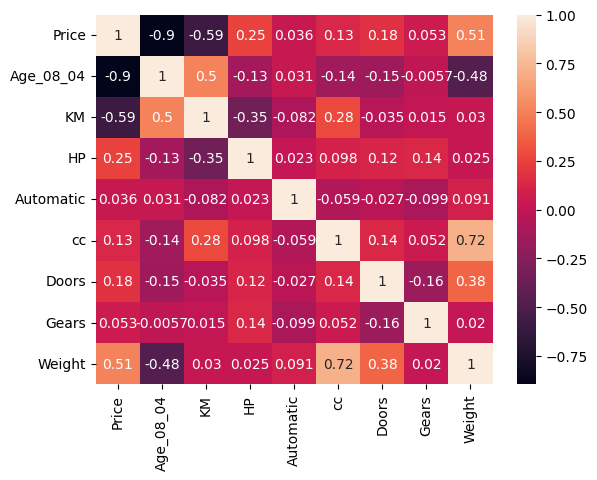

In [ ]:
# Correlation visualization
sns.heatmap(df.corr(numeric_only=True),annot=True)


In [ ]:
# Converting Categorical column into numerical column using get dummies
df = pd.get_dummies(data = df, columns = ['Fuel_Type'],dtype=int)
df


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,1900,3,5,1152,0,1,0
1,13750,23,72937,90,0,1900,3,5,1152,0,1,0
2,13950,24,41711,90,0,1900,3,5,1152,0,1,0
3,14950,26,48000,90,0,1900,3,5,1152,0,1,0
4,13750,30,38500,90,0,1900,3,5,1152,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,5,1025,0,0,1
1432,10845,72,19000,86,0,1300,3,5,1015,0,0,1
1433,8500,71,17016,86,0,1300,3,5,1015,0,0,1
1434,7250,70,16916,86,0,1300,3,5,1015,0,0,1


In [ ]:
# Creating instance for minmaxscaler
min_max=MinMaxScaler()

In [ ]:
#Fitting instance in data set
min_max.fit_transform(df)

array([[0.71206226, 0.24      , 0.19335471, ..., 0.        , 1.        ,
        0.        ],
       [0.73151751, 0.24      , 0.30014938, ..., 0.        , 1.        ,
        0.        ],
       [0.74708171, 0.25333333, 0.1716468 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.3229572 , 0.88      , 0.07002086, ..., 0.        , 0.        ,
        1.        ],
       [0.22568093, 0.86666667, 0.06960934, ..., 0.        , 0.        ,
        1.        ],
       [0.20233463, 0.94666667, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
# new transformed data set created
scaled_df=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
scaled_df


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.712062,0.240000,0.193355,0.295775,0.0,1.0,0.333333,0.666667,1.000000,0.0,1.0,0.0
1,0.731518,0.240000,0.300149,0.295775,0.0,1.0,0.333333,0.666667,1.000000,0.0,1.0,0.0
2,0.747082,0.253333,0.171647,0.295775,0.0,1.0,0.333333,0.666667,1.000000,0.0,1.0,0.0
3,0.824903,0.280000,0.197528,0.295775,0.0,1.0,0.333333,0.666667,1.000000,0.0,1.0,0.0
4,0.731518,0.333333,0.158433,0.295775,0.0,1.0,0.333333,0.666667,1.000000,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1430,0.245136,0.853333,0.084539,0.239437,0.0,0.0,0.333333,0.666667,0.164474,0.0,0.0,1.0
1431,0.505447,0.893333,0.078186,0.239437,0.0,0.0,0.333333,0.666667,0.098684,0.0,0.0,1.0
1432,0.322957,0.880000,0.070021,0.239437,0.0,0.0,0.333333,0.666667,0.098684,0.0,0.0,1.0
1433,0.225681,0.866667,0.069609,0.239437,0.0,0.0,0.333333,0.666667,0.098684,0.0,0.0,1.0


#Model : OLS

In [ ]:
# copy of data set created for vif
new_scaled_df=scaled_df.drop(columns=['Price'])

In [ ]:
df.head()


,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,1900,3,5,1152,0,1,0
1,13750,23,72937,90,0,1900,3,5,1152,0,1,0
2,13950,24,41711,90,0,1900,3,5,1152,0,1,0
3,14950,26,48000,90,0,1900,3,5,1152,0,1,0
4,13750,30,38500,90,0,1900,3,5,1152,0,1,0


In [ ]:
#Chcecking VIF
vif=pd.DataFrame()
vif['Columns']=new_scaled_df.columns
vif['VIF']=[variance_inflation_factor(scaled_df.values,i) for i in range(len(new_scaled_df.columns))]
vif

,Columns,VIF
0,Age_08_04,7.605018
1,KM,5.598599
2,HP,2.309054
3,Automatic,10.446917
4,cc,1.151944
5,Doors,13.045468
6,Gears,1.414901
7,Weight,1.107609
8,Fuel_Type_CNG,5.009213
9,Fuel_Type_Diesel,3.808441


In [ ]:
#model 1st
m1=sm.ols('Price ~ Age_08_04 + KM + Fuel_Type_Petrol + Fuel_Type_Diesel + Fuel_Type_CNG + HP + Automatic + cc + Doors + Gears + Weight',data=scaled_df).fit()

In [ ]:
m1.pvalues

,0
Intercept,9.245592e-02
Age_08_04,1.455451e-289
KM,2.804403e-38
Fuel_Type_Petrol,9.245592e-02
Fuel_Type_Diesel,9.245592e-02
Fuel_Type_CNG,9.245592e-02
HP,5.672497e-04
Automatic,5.648315e-01
cc,1.856628e-04
Doors,2.300016e-02


In [ ]:
#model accuracy
m1.rsquared

0.8682422300288377

In [ ]:
#Model 2nd
m2=sm.ols('Price ~ Age_08_04 + KM + Fuel_Type_Diesel + Fuel_Type_CNG +  HP + Automatic + Gears + Doors + Weight',data=scaled_df).fit()

In [ ]:
m2.pvalues

,0
Intercept,2.483979e-149
Age_08_04,1.239698e-303
KM,9.871293e-43
Fuel_Type_Diesel,5.651158e-12
Fuel_Type_CNG,1.363982e-04
HP,7.410826e-01
Automatic,5.697288e-01
Gears,9.046989e-04
Doors,4.328767e-02
Weight,9.611542e-45


In [ ]:
# model acuuracy
m2.rsquared

0.8672548636618297

In [ ]:
#model 3
m3=sm.ols('Price ~ Age_08_04 + KM + Fuel_Type_Diesel + Fuel_Type_CNG + Automatic + cc + Doors + Weight',data=scaled_df).fit()

In [ ]:
m3.pvalues

,0
Intercept,0.000000e+00
Age_08_04,5.915903e-293
KM,2.309546e-41
Fuel_Type_Diesel,2.063129e-22
Fuel_Type_CNG,2.648649e-05
Automatic,8.280371e-01
cc,1.808923e-01
Doors,1.703581e-03
Weight,7.202564e-52


In [ ]:
#model accuracy
m3.rsquared

0.8663602270504782

In [ ]:
#model 4th
m4=sm.ols('Price ~ Age_08_04 + KM  + Fuel_Type_Diesel + Fuel_Type_CNG  + HP + Automatic + cc + Doors + Weight',data=scaled_df).fit()

In [ ]:
#model accuracy
m4.rsquared

0.8675659315979494

 # Lasso and Ridge

In [ ]:
scaled_df.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,0.712062,0.240000,0.193355,0.295775,0.0,1.0,0.333333,0.666667,1.0,0.0,1.0,0.0
1,0.731518,0.240000,0.300149,0.295775,0.0,1.0,0.333333,0.666667,1.0,0.0,1.0,0.0
2,0.747082,0.253333,0.171647,0.295775,0.0,1.0,0.333333,0.666667,1.0,0.0,1.0,0.0
3,0.824903,0.280000,0.197528,0.295775,0.0,1.0,0.333333,0.666667,1.0,0.0,1.0,0.0
4,0.731518,0.333333,0.158433,0.295775,0.0,1.0,0.333333,0.666667,1.0,0.0,1.0,0.0


In [ ]:
p=scaled_df.iloc[:,1:]  #independent column
q=scaled_df[["Price"]]
# fitting
# Split your data to train and test. Choose Splitting ratio wisely.
p_train, p_test, q_train, q_test = train_test_split(p,q, test_size=0.2, random_state=1)


# describes info about train and test set
print("Number transactions X_train dataset: ", p_train.shape)
print("Number transactions y_train dataset: ", q_train.shape)
print("Number transactions X_test dataset: ", p_test.shape)
print("Number transactions y_test dataset: ", q_test.shape)
# # ML Model - 2 Implementation

lasso = Lasso(alpha=0.01, max_iter=3000)

Number transactions X_train dataset:  (1148, 11)
Number transactions y_train dataset:  (1148, 1)
Number transactions X_test dataset:  (287, 11)
Number transactions y_test dataset:  (287, 1)


In [ ]:
# Fitting Lasso model
lasso.fit(p_train, q_train)

Lasso(alpha=0.01, max_iter=3000)

In [ ]:
# Defining Lasso model score
print(lasso.score(p_test, q_test))
print(lasso.score(p_train, q_train))

0.7682990570613752
0.7675514793953544


In [ ]:
#  lasso coefficient
lasso.coef_

array([-0.66708861, -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ])

In [ ]:
# lasso train and test model prediction
q_pred_train_lasso=lasso.predict(p_train)
q_pred_test_lasso=lasso.predict(p_test)

Actual Value vs Predicted value 


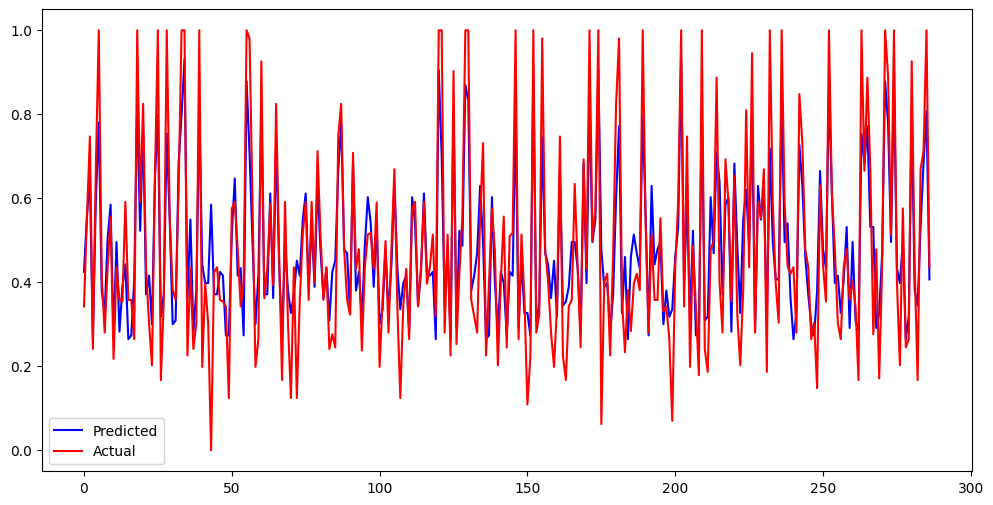

In [ ]:
print("Actual Value vs Predicted value ")
plt.figure(figsize=(12,6))
plt.plot((q_pred_test_lasso), color="blue")
plt.plot(np.array((q_test)),color="red")
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# ML Model - 3 Implementation
ridge= Ridge(alpha=0.01)



In [ ]:
# Fit the Algorithm
ridge_model=ridge.fit(x_train,y_train)

In [ ]:
# ridge rigression score check
ridge.score(x_train, y_train)


0.868450912873812

In [ ]:

# Predict on the model
y_pred_train_ridge=ridge.predict(x_train)
y_pred_test_ridge=ridge.predict(x_test)

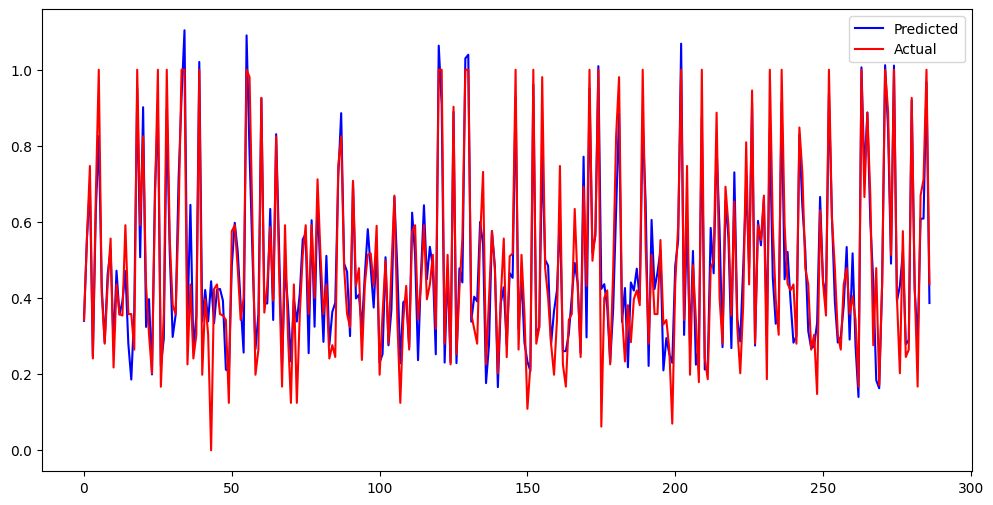

In [ ]:
plt.figure(figsize=(12,6))
plt.plot((y_pred_test_ridge), color="blue")
plt.plot(np.array((y_test)),color="red")
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
# actual vs predicated value comparision using lasso model
actual_vs_predict_ridge=pd.DataFrame({"actual":y_test,"prediction": y_pred_test_ridge})
actual_vs_predict_ridge

,actual,prediction
754,0.342412,0.340209
435,0.556420,0.557830
321,0.747082,0.697823
1393,0.241245,0.246770
288,0.669261,0.628917
...,...,...
1114,0.167315,0.283752
584,0.669261,0.608309
215,0.712062,0.608970
135,1.000000,0.967206


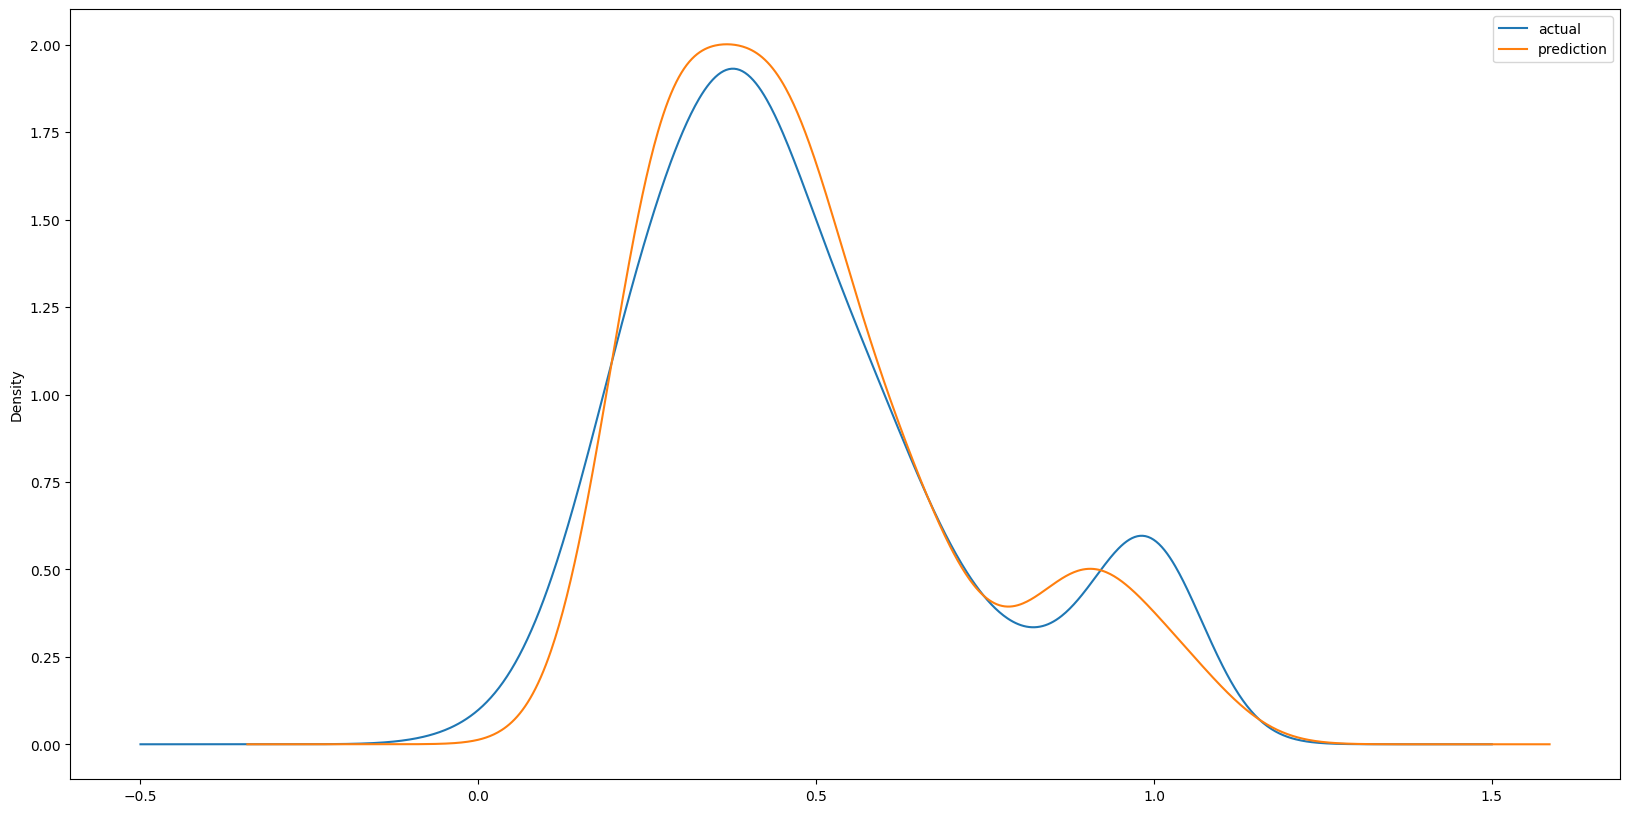

In [ ]:
actual_vs_predict_ridge.plot(kind="density",figsize=(20,10))
plt.show()

In [ ]:
df.shape

(1435, 12)

*  I got data set its about toyoto corolla car,  data set contain total 1435 rows and 12 columns.
* i have done graphical analysis on numerical and categorical columns.
* In graphical analysi i got some imporatnt insights.




1. Diesel cars are  more expensive than petrol cars followed by CNG.
2. CNG cars has more HP than Petrol followed by disel.
3. Diesel cars has more CC than petrol cars followed by CNG.
4. CNG Cars are most driven followed by disel and petrol.
5. Car price is dependent on gear as gear number increase, car price also increase
6. As number of gear increases, HP also incrase.
these are the few insight.



* I have done some data pre processing like detect null values, identify duplicates values, outlier detection, colinearity.
* I have done some data treatment like null value imputation, outliers remove, standardization etc.
* After data treatment finally build model using ols.
*  I have created 4 model, after evaluating each model i have selected model 1st which r squred value is ~86%.
